In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of NLP4RE Tools Extraction Data

This Jupyter notebook contains the code to visualize the data generated during the NLP4RE tools extraction process. Check the [README.md](../README.md) file located in the replication directory for more info on requirements and setup.

## Variables

Firstly, define the constants like the types of activities, tasks, availability, etc.

In [2]:
activities: list[str] = ['Elicitation', 'Analysis', 'Modeling', 'Validation & Verification', 'Management', 'Multiple', 'Other']
tasks: list[str] = ['Detection', 'Extraction', 'Classification', 'Translation', 'Tracing & Relating', 'Search & Retrieval', 'Generation']

venues: list[str] = ['RE', 'REFSQ', 'REJ', 'AIRE', 'JSS', 'ASE', 'DKE', 'ICSE', 'IST', 'NLP4RE', 'TSE', 'SAC']
years: list[int] = [2019, 2020, 2021, 2022, 2023]

In [3]:
availability: list[str] = ['Proprietary', 'Private', 'Unavailable', 'Broken', 'Upon Request', 'Reachable', 'Open Source', 'Archived']
availability_color = {
    'Proprietary': '#424242', 
    'Private': '#b8b8b8', 
    'Unavailable': '#990000', 
    'Broken': '#e69238', 
    'Upon Request': '#bf9000', 
    'Reachable': '#f1c132', 
    'Open Source': '#6aa84f', 
    'Archived': '#0000ff'
}

## Data

Next, load the data from the xlsx file. The data can also be inspected using spreadsheet programs like Microsoft Excel. Furthermore, filter the data for only *included* tools.

In [4]:
# load the data
df = pd.read_excel('../data/nlp4re-tools-data.xlsx', sheet_name='Potential Articles', skiprows=2)

# filter for articles that have been included
dfinc = df[df['Verdict']=='included']

## Visualizations

The following blocks generate the figures for the manuscript.

### Included papers

This figure visualizes the number of included papers per venue and year. It shows which venues are prominent in containing NLP4RE tools.

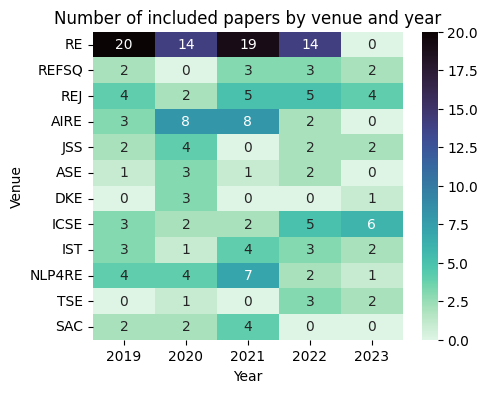

In [5]:
combinations: dict = df[['Venue', 'Year']].value_counts().to_dict()

matrix = {venue: [0]*len(years) for venue in venues}
for venue in venues:
    for year in years:
        amount = 0
        if (venue, year) in combinations:
            amount = combinations[(venue,year)]
        matrix[venue][years.index(year)] = amount

dfmatrix = pd.DataFrame.from_dict(matrix, orient='index', columns=years)

plt.figure(figsize=(5,4))
viz = sns.heatmap(data=dfmatrix, cmap='mako_r', annot=True)
viz.set(title='Number of included papers by venue and year', xlabel='Year', ylabel='Venue')

plt.savefig(fname=f'../figures/matrix-inclusion.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Tool categorization

This figure visualizes the distribution of activity and task types among the included tools. It shows correlations of task types that are typically employed to support certain RE activities.

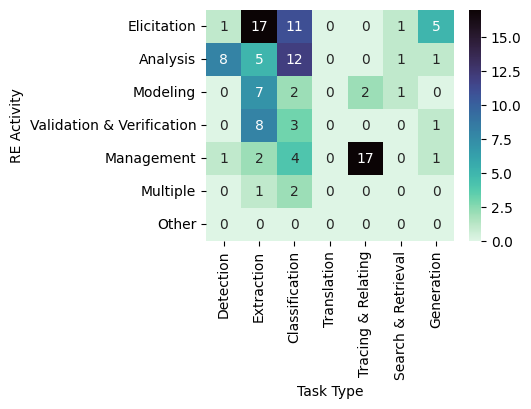

In [6]:
combinations: dict = df[['RE Activity', 'Tool Task']].value_counts().to_dict()

matrix = {activity: [0]*len(tasks) for activity in activities}
for activity in activities:
    for tid, task in enumerate(tasks):
        amount = 0
        if (activity, task) in combinations:
            amount = combinations[(activity, task)]
        matrix[activity][tasks.index(task)] = amount

dfmatrix = pd.DataFrame.from_dict(matrix, orient='index', columns=tasks)

plt.figure(figsize=(4,3))
viz = sns.heatmap(data=dfmatrix, cmap='mako_r', annot=True)
#viz.set(title='Tools by Activity and Task Type', xlabel='Task Type', ylabel='RE Activity')
viz.set(xlabel='Task Type', ylabel='RE Activity')

plt.savefig(fname=f'../figures/matrix-tools.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Availability

This figure visualizes the distribution of availability codes among the extracted tools.

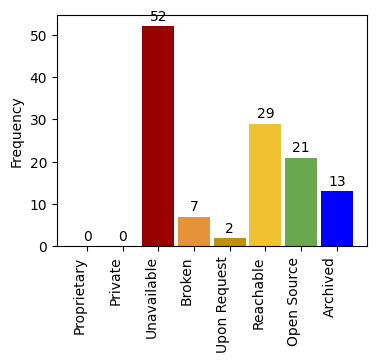

In [7]:
availability_count: dict = df['Availability'].value_counts().to_dict()
availability_count_ordered = {code: (availability_count[code] if (code in availability_count) else 0) for code in availability}

plt.figure(figsize=(4, 3))
ax = plt.subplot()
bar = plt.bar(x=availability_count_ordered.keys(), height=availability_count_ordered.values(), width=0.9, color=availability_color.values())
ax.bar_label(bar, padding=2)

#plt.title('Distribution of tool availability')
#plt.xlabel('Availability codes')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')

plt.savefig(fname='../figures/distribution-availability.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Licenses

This figure visualizes the distribution of licenses used by the extracted tools.

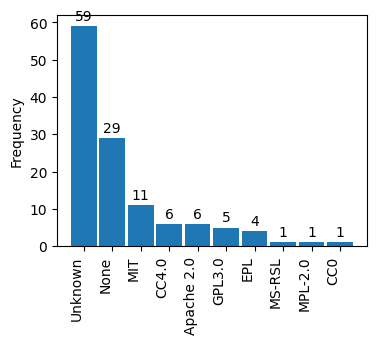

In [8]:
license_count: dict = dfinc['License'].value_counts().to_dict()

plt.figure(figsize=(4, 3))
ax = plt.subplot()
bar = plt.bar(x=license_count.keys(), height=license_count.values(), width=0.9)
ax.bar_label(bar, padding=2)

#plt.title('Distribution of licenses')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')

plt.savefig(fname='../figures/distribution-licenses.pdf', format='pdf', bbox_inches='tight')
plt.show()